# Transfer Learning Integration

Team2 Computer Vision


In [ ]:
### FOR THIS METHOD FOLDER STRUCTURE
#
# all_images_1st_practice
#       1_train
#           1_selfie_indoor  400
#           2_selfie_outdoor 400 
#           3_pose_indoor    400
#           4_pose_outdoor   400  
#           5_without_human  400
#
#       2_validation
#           1_selfie_indoor  50
#           2_selfie_outdoor 50 
#           3_pose_indoor    50
#           4_pose_outdoor   50   
#           5_without_human  50
#
#       3_test                          ###NOTE 4_test in this notebook
#           1_selfie_indoor  50
#           2_selfie_outdoor 50 
#           3_pose_indoor    50
#           4_pose_outdoor   50   
#           5_without_human  50          


In [1]:
import keras

In [2]:
# #Option 1 - Upload the folder to drive and add access to your drive to google colab with this function 
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# #Option 2 - Upload the zipped file in the Files part on the left part of your GUI and unzip it with this command
# !unzip cats_and_dogs_filtered.zip

In [28]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

import pathlib
data_dir = pathlib.Path(r"C:\all_images_1st_practice")
data_dir


#base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(data_dir, '1_train')
validation_dir = os.path.join(data_dir, '2_validation')
test_dir = os.path.join(data_dir, '4_test')

In [5]:
validation_dir

'C:\\all_images_1st_practice\\2_validation'

In [6]:
from tensorflow.keras.applications.mobilenet import MobileNet

conv_base = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.trainable = False


In [7]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [8]:
# datagen = ImageDataGenerator(rescale=1./255)
# batch_size = 50

# def extract_features(directory, sample_count):
#     features = np.zeros(shape=(sample_count, 7, 7, 1024))
#     labels = np.zeros(shape=(sample_count))
#     generator = datagen.flow_from_directory(
#         directory,
#         target_size=(224, 224),
#         batch_size=batch_size,
#         class_mode='categorical')
#     i = 0
#     for inputs_batch, labels_batch in generator:
#         features_batch = conv_base.predict(inputs_batch)
#         features[i * batch_size : (i + 1) * batch_size] = features_batch
#         labels[i * batch_size : (i + 1) * batch_size] = labels_batch
#         i += 1
#         if i * batch_size >= sample_count:
#             # Note that since generators yield data indefinitely in a loop,
#             # we must `break` after every image has been seen once.
#             break
#     return features, labels

# train_features, train_labels = extract_features(train_dir, 700)
# validation_features, validation_labels = extract_features(validation_dir, 480)
# test_features, test_labels = extract_features(test_dir, 520)

# ### ValueError: could not broadcast input array from shape (50,5) into shape (50)

## MODEL 2 - Pretrained model, feature extraction

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
#model.add(layers.InputLayer(shape=(224,224,3)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer= "sgd",
              metrics=['acc'])

This is what our model looks like now:

In [10]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [98]:
from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       #rotation_range=10, # These are disabled for this exercise because the training would be slow
#       #width_shift_range=0.01,# 
#       #height_shift_range=0.01,#
#       #shear_range=0.01,# 
#       #zoom_range=0.01,# 
#       #horizontal_flip=True,#
#       fill_mode='nearest')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)


train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=10,  #would be the goal 32
        class_mode='categorical')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2)

Found 1992 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Epoch 1/50


D:\Anaconda_Python\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


20/20 - 8s - loss: 0.1497 - acc: 0.9350 - val_loss: 0.3957 - val_acc: 0.8600
Epoch 2/50
20/20 - 7s - loss: 0.3574 - acc: 0.8900 - val_loss: 0.9423 - val_acc: 0.6700
Epoch 3/50
20/20 - 7s - loss: 0.2538 - acc: 0.9050 - val_loss: 0.4029 - val_acc: 0.8100
Epoch 4/50
20/20 - 7s - loss: 0.2031 - acc: 0.9350 - val_loss: 0.5388 - val_acc: 0.8400
Epoch 5/50
20/20 - 7s - loss: 0.2542 - acc: 0.9150 - val_loss: 0.4078 - val_acc: 0.8500
Epoch 6/50
20/20 - 8s - loss: 0.1190 - acc: 0.9500 - val_loss: 0.7662 - val_acc: 0.7700
Epoch 7/50
20/20 - 7s - loss: 0.2861 - acc: 0.9250 - val_loss: 0.9173 - val_acc: 0.7400
Epoch 8/50
20/20 - 8s - loss: 0.1375 - acc: 0.9350 - val_loss: 0.6088 - val_acc: 0.8100
Epoch 9/50
20/20 - 7s - loss: 0.2211 - acc: 0.9350 - val_loss: 0.5982 - val_acc: 0.7700
Epoch 10/50
20/20 - 7s - loss: 0.1790 - acc: 0.9500 - val_loss: 0.5012 - val_acc: 0.8900
Epoch 11/50
20/20 - 7s - loss: 0.0830 - acc: 0.9750 - val_loss: 0.8591 - val_acc: 0.8000
Epoch 12/50
20/20 - 7s - loss: 0.1127 - a

Let's plot our results again:

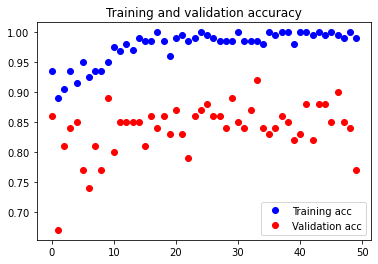

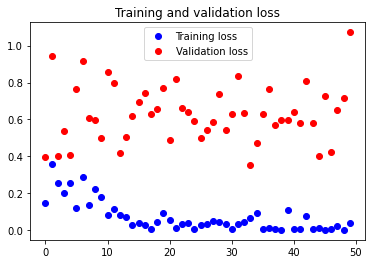

In [129]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [101]:
# labels = (train_generator.class_indices)
# # labels = dict((v,k) for k,v in labels.items())
# # predictions = [labels[k] for k in predicted_class_indices]

train_generator.class_indices

{'1_selfie_indoor': 0,
 '2_selfie_outdoor': 1,
 '3_pose_indoor': 2,
 '4_pose_outdoor': 3,
 '5_without_human': 4}

In [130]:
# test_datagen = ImageDataGenerator(rescale = 1./255)

# # test_generator = test_datagen.flow_from_directory(
# #         r"C:\all_images_1st_practice\4_test")


# test_generator = test_datagen.flow_from_directory(
#         test_dir,
#         target_size=(224, 224),
#         batch_size=50,
#         class_mode='categorical')

# test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
# print('test acc:', test_acc)
# print('test loss:', test_loss)


### 2nd testing

test_datagen = ImageDataGenerator(rescale = 1./255)

# test_generator = test_datagen.flow_from_directory(
#         r"C:\all_images_1st_practice\4_test")


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)


Found 250 images belonging to 5 classes.
test acc: 0.9200000166893005
test loss: 0.30262649059295654


In [ ]:
#Predictions how to show

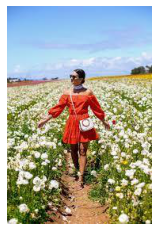

In [61]:
new_image = plt.imread(r"C:\all_images_1st_practice\4_test\testing_1.jpg")
plt.axis("off") 
img = plt.imshow(new_image)



# predictions = model.predict(r"C:\all_images_1st_practice\4_test\testing_1")
# predictions


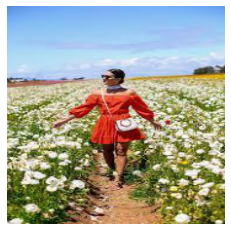

In [66]:
#Resize the image
from skimage.transform import resize
resized_image = resize (new_image, (224,224,3))
plt.axis("off") 
img = plt.imshow(resized_image)

In [67]:
#get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[3.0973777e-05, 4.3364642e-03, 1.5477623e-03, 9.9298877e-01,
        1.0960775e-03]], dtype=float32)

In [68]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range (5):
  for j in range (5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order
print(list_index)

[3, 1, 2, 4, 0]


In [69]:
# labels = (train_generator.class_indices)
# # labels = dict((v,k) for k,v in labels.items())
# # predictions = [labels[k] for k in predicted_class_indices]

# # #train_generator.class_indices
# labels

classification = ['selfie_indoor', 'selfie_outdoor','pose_indoor','pose_outdoor','without_human']

In [70]:
#print the first 5 predictions

for i in range(5):
  print(classification[list_index[i]], ":", round( predictions[0][list_index[i]] * 100, 2), "%")

pose_outdoor : 99.3 %
selfie_outdoor : 0.43 %
pose_indoor : 0.15 %
without_human : 0.11 %
selfie_indoor : 0.0 %


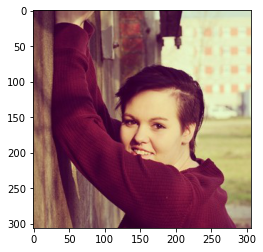

In [103]:
#2nd test

new_image = plt.imread(r"C:\all_images_1st_practice\4_test\testing_2.jpg")
#plt.axis("off") 
img = plt.imshow(new_image)


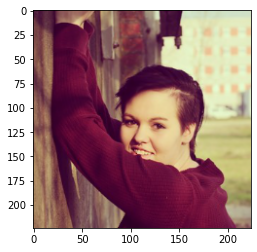

In [104]:
#Resize the image
from skimage.transform import resize
resized_image = resize (new_image, (224,224,3))
#plt.axis("off") 
img = plt.imshow(resized_image)

In [105]:
#get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[7.9196870e-02, 9.7749665e-02, 7.8404641e-01, 3.8756702e-02,
        2.5036396e-04]], dtype=float32)

In [106]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range (5):
  for j in range (5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order
print(list_index)

[2, 1, 0, 3, 4]


In [107]:
#print the first 5 predictions

for i in range(5):
  print(classification[list_index[i]], ":", round( predictions[0][list_index[i]] * 100, 2), "%")

pose_indoor : 78.4 %
selfie_outdoor : 9.77 %
selfie_indoor : 7.92 %
pose_outdoor : 3.88 %
without_human : 0.03 %


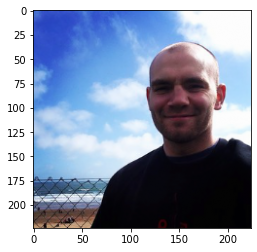

In [108]:
#3rd test

new_image = plt.imread(r"C:\all_images_1st_practice\4_test\testing_3.jpg")
#plt.axis("off") 
#img = plt.imshow(new_image
                 
#Resize the image
from skimage.transform import resize
resized_image = resize (new_image, (224,224,3))
#plt.axis("off") 
img = plt.imshow(resized_image)

In [109]:
#get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[8.7888784e-06, 9.9881774e-01, 1.8156154e-06, 1.1699360e-03,
        1.6301261e-06]], dtype=float32)

In [110]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range (5):
  for j in range (5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order
print(list_index)

[1, 3, 0, 2, 4]


In [111]:
#print the first 5 predictions

for i in range(5):
  print(classification[list_index[i]], ":", round( predictions[0][list_index[i]] * 100, 2), "%")

selfie_outdoor : 99.88 %
pose_outdoor : 0.12 %
selfie_indoor : 0.0 %
pose_indoor : 0.0 %
without_human : 0.0 %


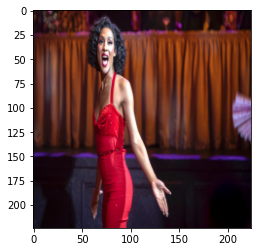

In [112]:
#4th test

new_image = plt.imread(r"C:\all_images_1st_practice\4_test\testing_4.jpg")
#plt.axis("off") 
#img = plt.imshow(new_image
                 
#Resize the image
from skimage.transform import resize
resized_image = resize (new_image, (224,224,3))
#plt.axis("off") 
img = plt.imshow(resized_image)

In [113]:
#get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[2.3962345e-03, 1.1926605e-03, 9.8352194e-01, 1.2829563e-02,
        5.9541759e-05]], dtype=float32)

In [114]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range (5):
  for j in range (5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order
print(list_index)

[2, 3, 0, 1, 4]


In [115]:
#print the first 5 predictions

for i in range(5):
  print(classification[list_index[i]], ":", round( predictions[0][list_index[i]] * 100, 2), "%")

pose_indoor : 98.35 %
pose_outdoor : 1.28 %
selfie_indoor : 0.24 %
selfie_outdoor : 0.12 %
without_human : 0.01 %


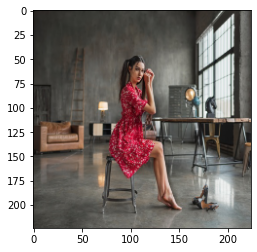

In [116]:
#5th test

new_image = plt.imread(r"C:\all_images_1st_practice\4_test\testing_5.jpg")
#plt.axis("off") 
#img = plt.imshow(new_image
                 
#Resize the image
from skimage.transform import resize
resized_image = resize (new_image, (224,224,3))
#plt.axis("off") 
img = plt.imshow(resized_image)

In [117]:
#get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

#Sort the predictions from least to greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range (5):
  for j in range (5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order
#print(list_index)

#print the first 5 predictions

for i in range(5):
  print(classification[list_index[i]], ":", round( predictions[0][list_index[i]] * 100, 2), "%")

pose_outdoor : 76.06 %
pose_indoor : 23.94 %
selfie_outdoor : 0.0 %
without_human : 0.0 %
selfie_indoor : 0.0 %
